In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from collections import Counter
import datetime
import wordcloud
import json

C:\Users\laksh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# Hiding warnings for cleaner display
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('INvideos.csv')

In [6]:
df.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...
5,il_pSa5l98w,17.14.11,"MCA (Middle Class Abbayi) TEASER - Nani,Sai Pa...",Dil Raju,24,2017-11-10T04:29:50.000Z,"Nenu Local|""Nenu Local Telugu Movie""|""Nani""|""S...",6106669,98612,4185,4763,https://i.ytimg.com/vi/il_pSa5l98w/default.jpg,False,False,False,Watch MCA- Middle Class Abbayi First Look Teas...
6,7MxiQ4v0EnE,17.14.11,Daang ( Full Video ) | Mankirt Aulakh | Sukh S...,Speed Records,10,2017-11-11T16:41:15.000Z,"punjabi songs|""punjabi bhangra""|""punjabi music...",5718766,127477,7134,8063,https://i.ytimg.com/vi/7MxiQ4v0EnE/default.jpg,False,False,False,Song - Daang\nSinger - Mankirt Aulakh\nFaceboo...
7,c64I9HNpiOY,17.14.11,Padmavati : Ek Dil Ek Jaan Video Song | Deepik...,T-Series,10,2017-11-11T06:14:19.000Z,"Ek Dil Ek Jaan Video Song|""'Ek Dil Ek Jaan'""|""...",10588371,132738,8812,10847,https://i.ytimg.com/vi/c64I9HNpiOY/default.jpg,False,False,False,Presenting the song 'Ek Dil Ek Jaan' from Padm...
8,KObFEYCaRx8,17.14.11,Chiranjeevi in Naga Chaitanya - Samantha Recep...,Top Telugu Media,24,2017-11-13T04:42:26.000Z,Chiranjeevi in Naga Chaitanya - Samantha Recep...,118223,520,53,23,https://i.ytimg.com/vi/KObFEYCaRx8/default.jpg,False,False,False,Chiranjeevi in Naga Chaitanya - Samantha Recep...
9,g8QsfJhFpjY,17.14.11,New bike vs Old bike - the reality,Jump Cuts,24,2017-11-12T04:30:01.000Z,"Jump cuts|""Jumpcuts""|""Tamil comedy""|""Tamil Com...",969030,59798,1545,2404,https://i.ytimg.com/vi/g8QsfJhFpjY/default.jpg,False,False,False,Jump Cuts is a Tamil entertaining group by Har...


In [7]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                37352 non-null  object
 1   trending_date           37352 non-null  object
 2   title                   37352 non-null  object
 3   channel_title           37352 non-null  object
 4   category_id             37352 non-null  int64 
 5   publish_time            37352 non-null  object
 6   tags                    37352 non-null  object
 7   views                   37352 non-null  int64 
 8   likes                   37352 non-null  int64 
 9   dislikes                37352 non-null  int64 
 10  comment_count           37352 non-null  int64 
 11  thumbnail_link          37352 non-null  object
 12  comments_disabled       37352 non-null  bool  
 13  ratings_disabled        37352 non-null  bool  
 14  video_error_or_removed  37352 non-null  bool  
 15  de

In [11]:
df[df['description'].apply(lambda x: pd.isna(x))].head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
24,znOC3IU0dF8,17.14.11,Hero Tarun at #ChaySamWeddingReception | Saman...,News Mantra,24,2017-11-13T06:03:49.000Z,Hero Tarun At Samantha Naga Chaitanya Wedding ...,55178,45,94,15,https://i.ytimg.com/vi/znOC3IU0dF8/default.jpg,False,False,False,NaN
25,z3V9LUA6VQM,17.14.11,ఆమె బ్యాంకు అకౌంట్ లో పొరపాటున 125 కోట్లు జమయా...,OmFut,24,2017-11-12T09:45:58.000Z,[none],236710,858,197,66,https://i.ytimg.com/vi/z3V9LUA6VQM/default.jpg,False,False,False,NaN
36,qP67alYxSiU,17.14.11,కెమెరాలో రికార్డ్ అయిన ఈ అద్భుతాన్ని చూస్తే ఆశ...,HOTNEWS TELUGU,26,2017-11-12T03:53:49.000Z,"Miracles Caught on Camera|""Miracles Caught on ...",128851,0,0,0,https://i.ytimg.com/vi/qP67alYxSiU/default.jpg,True,True,False,NaN


In [13]:
df['description']=df['description'].fillna(value='')

In [15]:
df.nunique()

video_id                  16307
trending_date               205
title                     16721
channel_title              1426
category_id                  17
publish_time              16339
tags                      12578
views                     32136
likes                     15529
dislikes                   5079
comment_count              6027
thumbnail_link            16523
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description               13993
dtype: int64

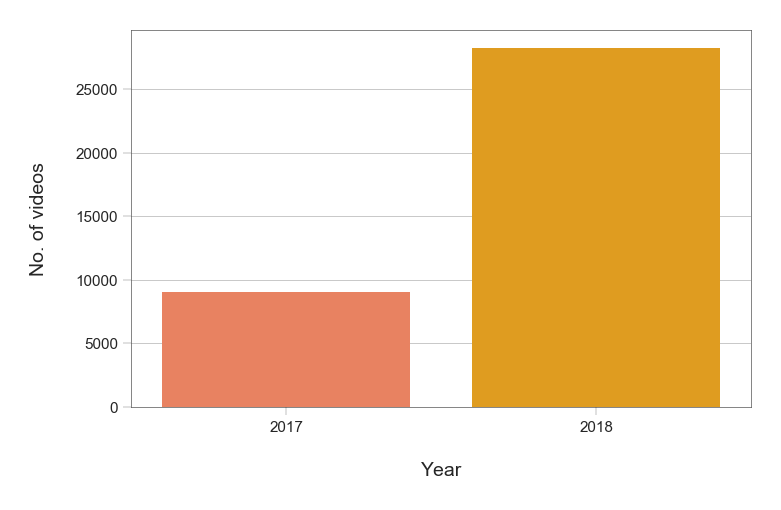

In [16]:
cdf = df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "trending_date": "No_of_videos"})

fig, ax = plt.subplots()
_ = sns.barplot(x="year", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Year", ylabel="No. of videos")

In [17]:
df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts(normalize=True)

2018   0.76
2017   0.24
Name: trending_date, dtype: float64

In [18]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,37352.00,37352.00,37352.00,37352.00,37352.00
mean,21.58,1060477.65,27082.72,1665.08,2677.00
std,6.56,3184932.05,97145.10,16076.17,14868.32
min,1.00,4024.00,0.00,0.00,0.00
25%,23.00,123915.50,864.00,108.00,81.00
50%,24.00,304586.00,3069.00,326.00,329.00
75%,24.00,799291.25,13774.25,1019.25,1285.00
max,43.00,125432237.00,2912710.00,1545017.00,827755.00
